<a href="https://colab.research.google.com/github/colgate116/T_rex_game/blob/master/CompVision_Shark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Модель YOLO с тренировкой на своих файла

In [1]:
!nvidia-smi
!pip install ultralytics

Sun May 19 16:49:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import glob
import torch
from IPython.display import display, Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import numpy as np
import io
import cv2
import zipfile
from moviepy.editor import *
from tqdm import tqdm_notebook
from base64 import b64encode

Загружаем zip.архив

In [3]:
HOME = "/content"
dataSet_name = "Shark_v2.zip"

In [4]:
zip_file = f"/{HOME}/{dataSet_name}"
output = f"/{HOME}"

with zipfile.ZipFile(zip_file,'r') as zip_ref:
  zip_ref.extractall(output)

/content/datasets


In [5]:
img_path = f"/{output}/train/images/"
lbl_path = f"/{output}/train/labels/"
img_name = os.listdir(img_path)
lbl_name = os.listdir(lbl_path)

In [6]:
labels = []
for i in range(len(lbl_name)):
  with open (lbl_path+lbl_name[i]) as file:
    temp = file.read()
    labels.append(temp)
classes = ["Person","Shark"]

In [7]:
img_path = "/train/images"

In [8]:
yaml_file = f"train: ..{img_path}\nval: ..{img_path}\n\nnames:\n 0: '{classes[0]}' \n 1: '{classes[1]}'"
with open("//content/data.yaml", "w") as f:
  f.write(yaml_file)
%cat /content/data.yaml

train: ../train/images
val: ../train/images

names:
 0: 'Person' 
 1: 'Shark'

In [9]:
yaml_path = '/content/data.yaml'

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={yaml_path} epochs=300 conf=0.5 imgsz=640 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 215MB/s]
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.5, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={yaml_path}

/content
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/train/labels.cache... 74 images, 1 backgrounds, 0 corrupt: 100% 74/74 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:07<00:00,  1.55s/it]
                   all         74        134      0.994          1      0.995       0.96
                Person         74         56      0.997          1      0.995       0.93
                 Shark         74         78      0.991          1      0.995       0.99
Speed: 1.4ms preprocess, 22.0ms inference, 0.1ms loss, 46.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.45 source={HOME}/{img_path} save=True

/content
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/74 /content/train/images/1_png.rf.86cb38d3e8f472c1c61ce191ba4d6d6f.jpg: 384x640 1 Shark, 115.0ms
image 2/74 /content/train/images/2_png.rf.341766d5c0a44cf6821391ace5de592f.jpg: 384x640 1 Shark, 25.2ms
image 3/74 /content/train/images/3_png.rf.b486105402d8ea936c99bcdbcc03b661.jpg: 384x640 1 Shark, 25.1ms
image 4/74 /content/train/images/vlcsnap-2024-05-16-17h10m23s331_png.rf.69ffd43c6b8cd37511aee4dc2532c5ab.jpg: 384x640 1 Shark, 25.1ms
image 5/74 /content/train/images/vlcsnap-2024-05-16-17h10m33s266_png.rf.b217c0650afced498f0e5821c11f9c80.jpg: 384x640 1 Shark, 24.2ms
image 6/74 /content/train/images/vlcsnap-2024-05-16-17h10m41s159_png.rf.3d2ed9ac87b5fef6a64c89e838d4c6f7.jpg: 384x640 3 Sharks, 23.6ms
image 7/74 /content/train/images/vlcsnap-2024-05-16-17h10m46s284_png.rf.e4a0b1fde67f7600c43de3aa7cdc21dc.j

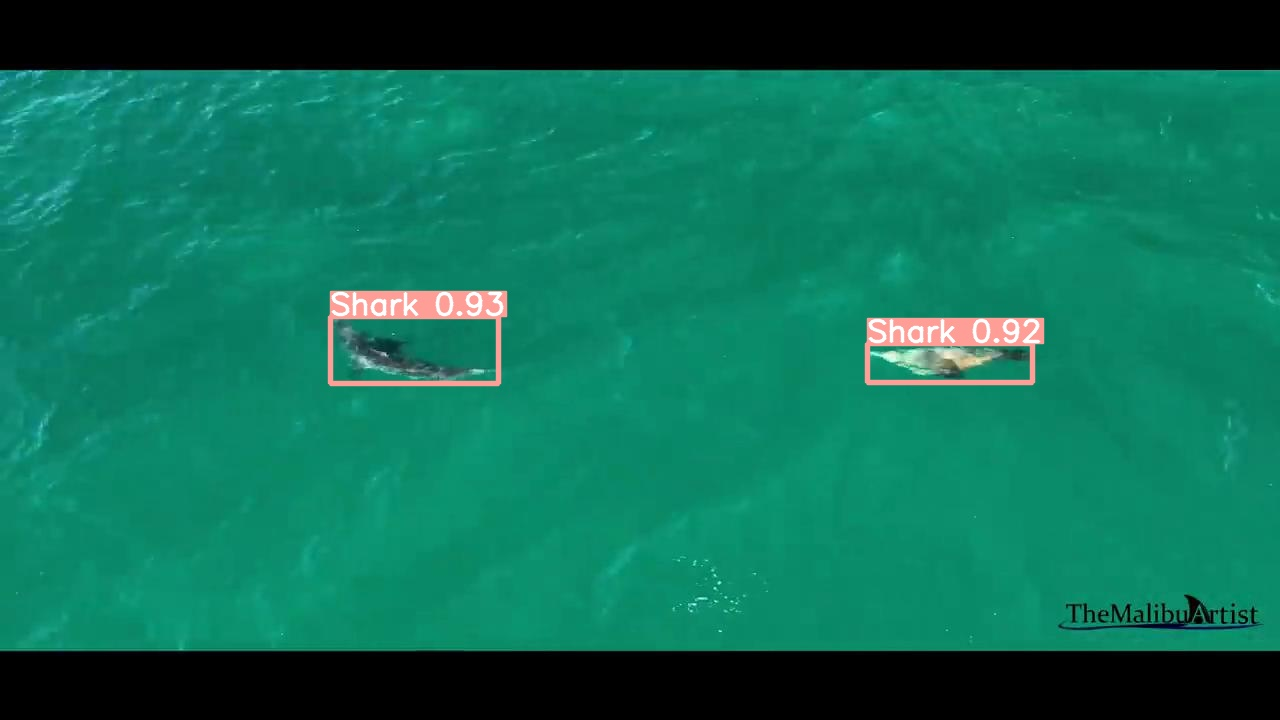

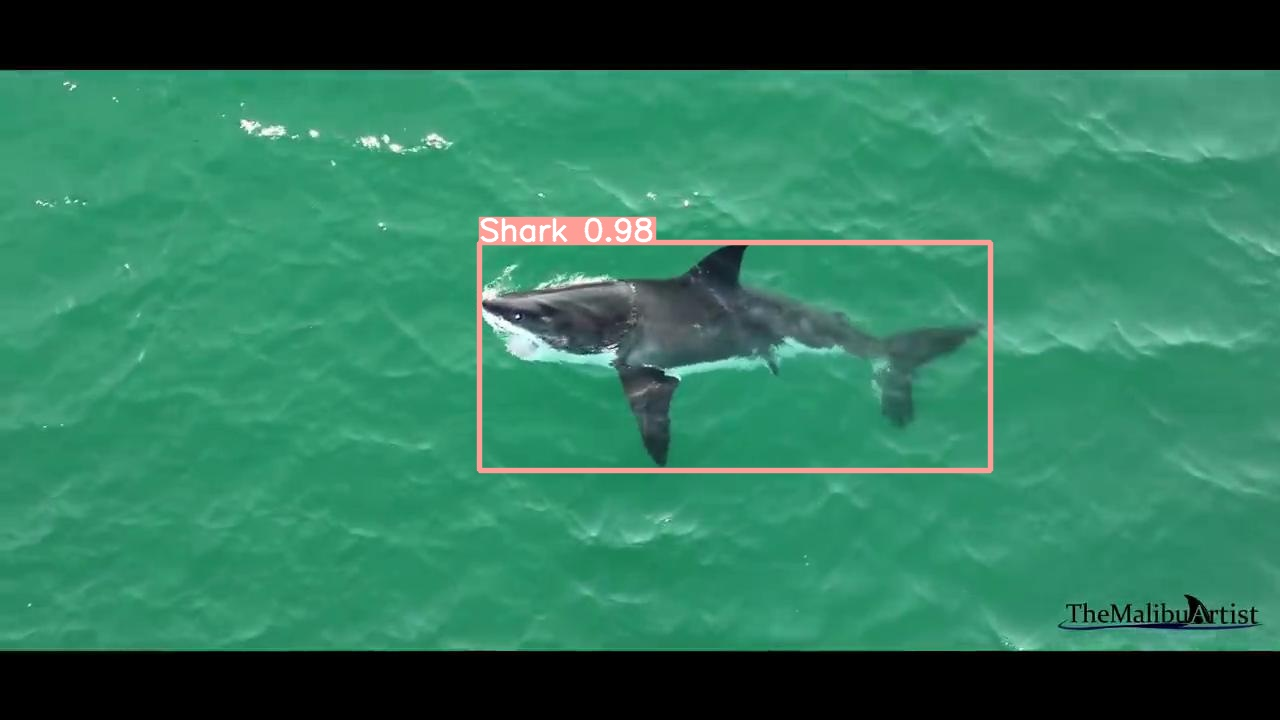

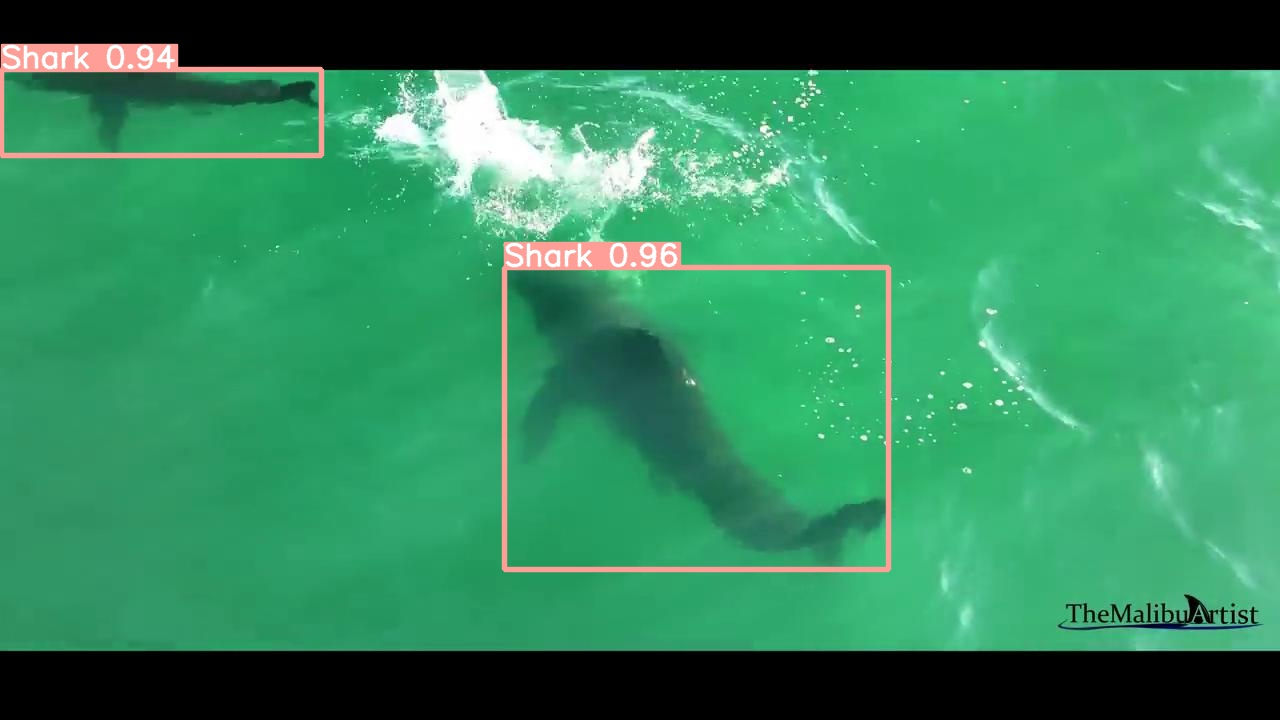

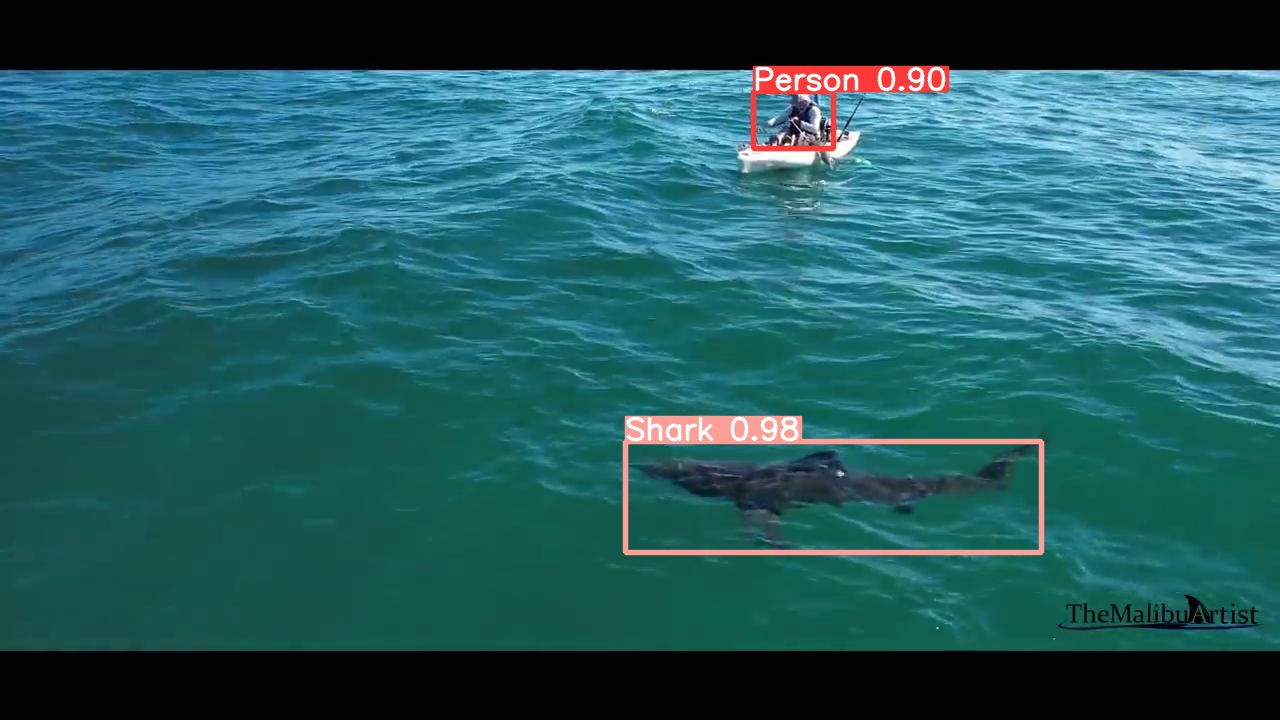

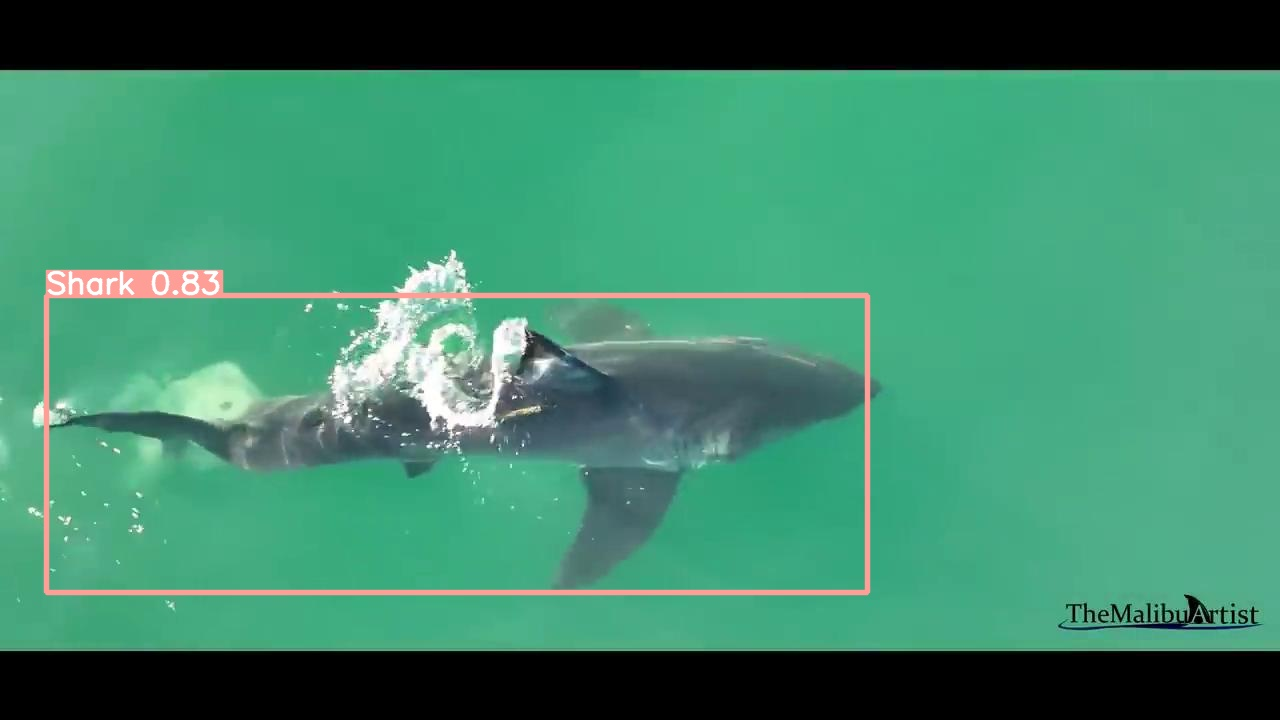

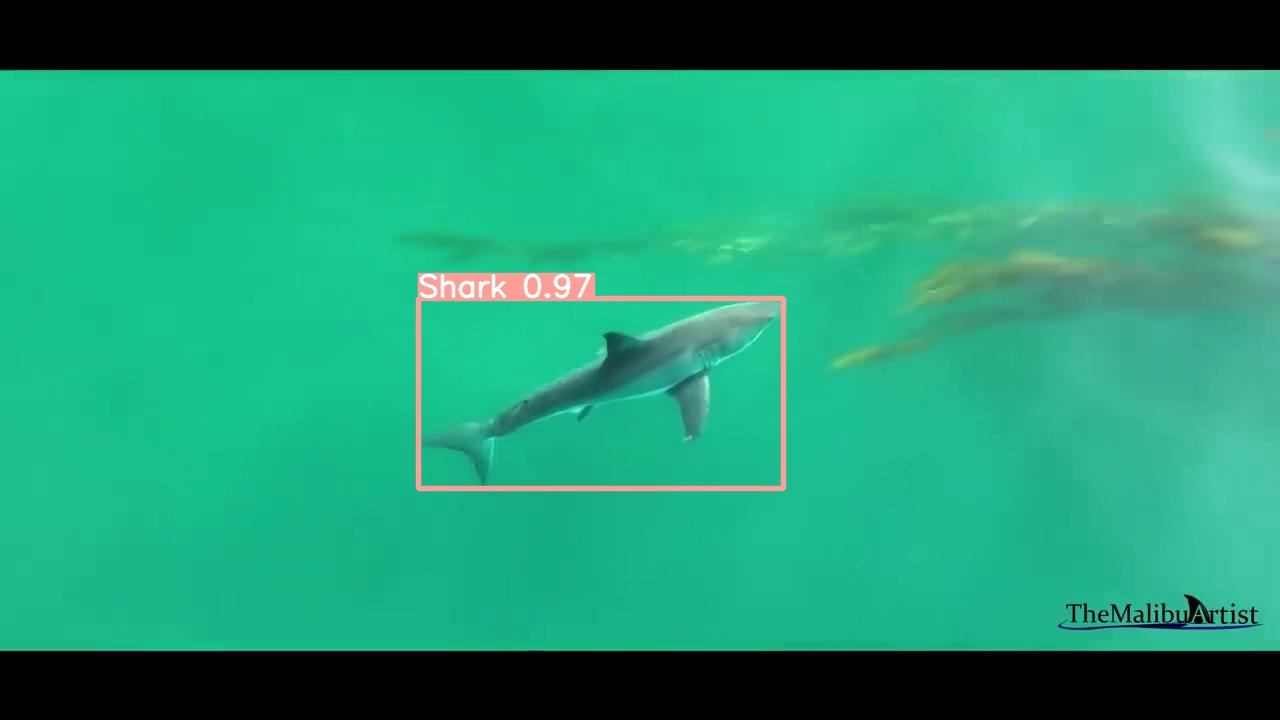

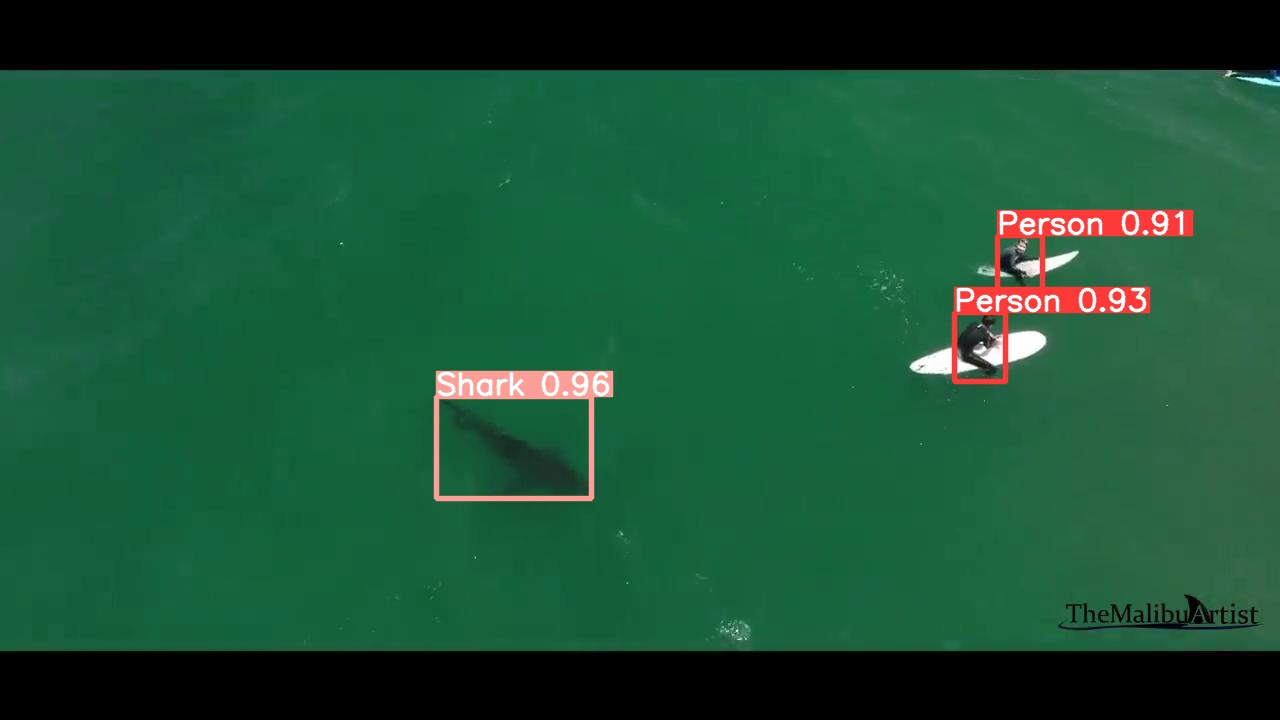

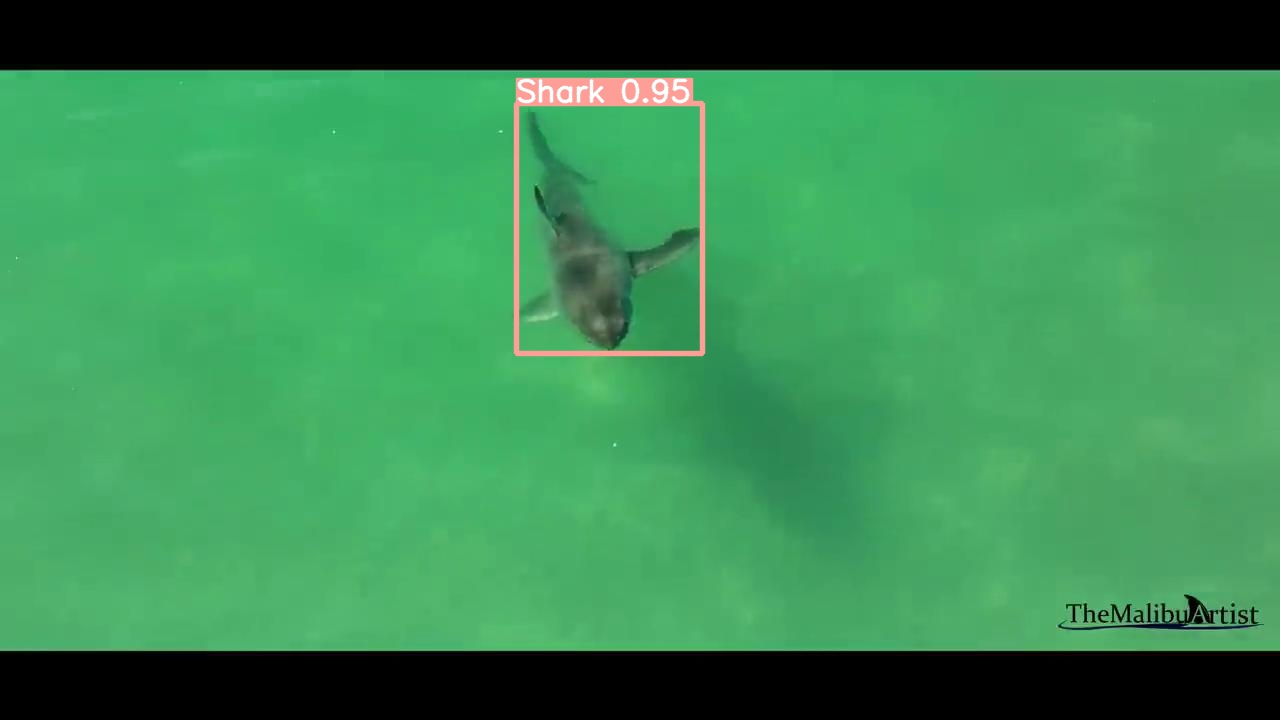

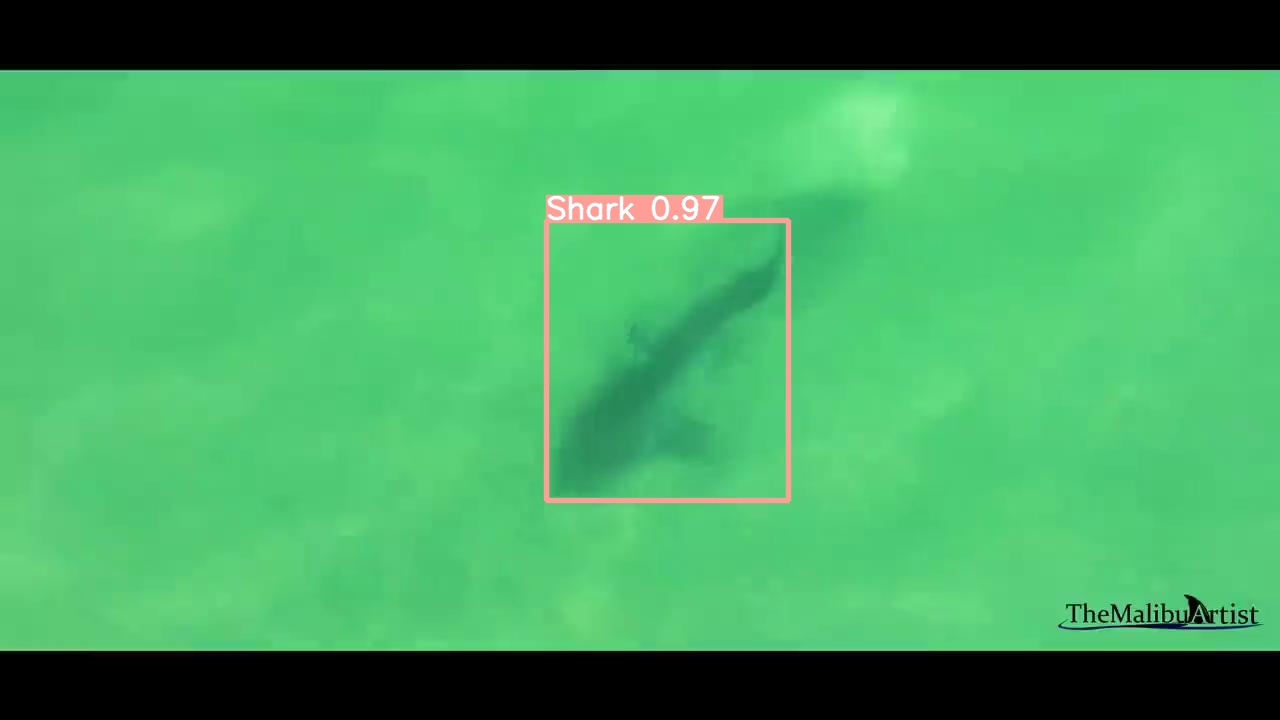

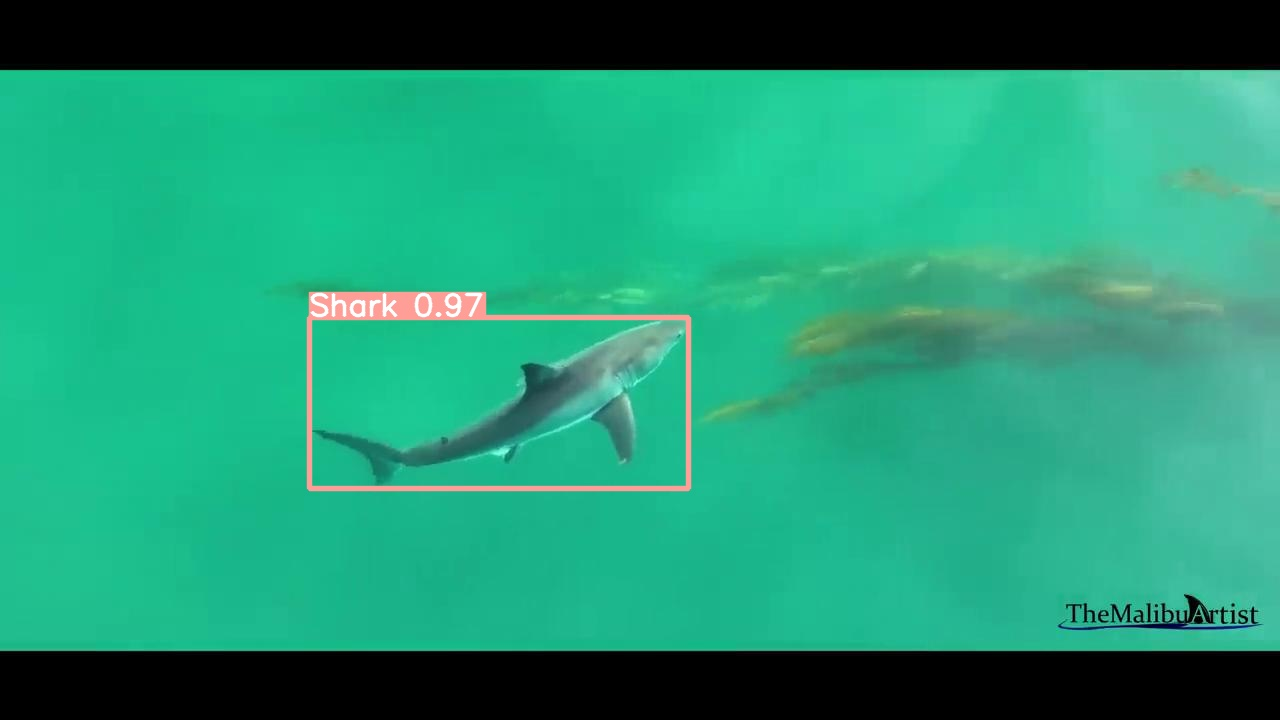

In [13]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
    display(Image(filename=image_path, width=640))
    print("\n")

Загрузить видео

In [14]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=c3f36252bc2ee7964d9a58c0093599e2e82d12c104ccfcf2043195c97eda55e5
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [15]:
from ultralytics import YOLO
import cvzone
from enum import Enum

In [16]:
class Color(Enum):
    # brg
    RED = (0, 0, 180)
    PURPLE = (180, 0, 180)
    ORANGE = (0, 150, 180)
    YELLOW = (0, 180, 180)
    GREEN = (0, 180, 0)
    BLUE = (180, 0, 0)

In [17]:
# Отрисовка рамки
def bounding_box(img, coordinates, class_id):
    """
    :param img:
    :param coordinates: (x1, y1, x2, y2)
    :param class_id: id of detected class
    :return:
    """
    # С масштабированием под разные разрешения
    x1, y1, x2, y2 = coordinates
    w0 = 640
    w, h = x2 - x1, y2 - y1
    h1, w1, c = img.shape
    k = w1 / w0
    class_name = classes[class_id]
    colors = [color.value for color in Color]
    class_color = colors[class_id]
    cvzone.cornerRect(img, (x1, y1, w, h), l=int(min(w, h) * 0.25), t=int(k), rt=0,
                      colorC=class_color)
    cvzone.putTextRect(img, f"{class_name}", (x1, y1 - h1 // 144), scale=k, thickness=int(k), offset=0,
                      colorR=class_color)

In [18]:
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(f"{model_path}")
classes = model.names

In [19]:
media_path = r"sharks.mp4"
media = cv2.VideoCapture(f"{media_path}")
frame_width = int(media.get(3))
frame_height = int(media.get(4))

# img = cv2.imread(f"{img_path}")
# success, img = video.read()

In [20]:
output_media = cv2.VideoWriter("Shark_detection.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

In [ ]:
while media.isOpened():
    success, img = media.read()

    if not success:
        break

    res = model(img, stream=True)
    for r in res:
        boxes = r.boxes
        for box in boxes:
            coordinates = map(int, box.xyxy[0])
            class_id = int(box.cls[0])
            bounding_box(img, coordinates, class_id)

    #img = cv2.resize(img, (1280, 720))
    output_media.write(img)
    #cv2.imshow("Image", img)
    #cv2.waitKey(1)
media.release()
output_media.release()
#cv2.destroyWindow()

Выходные данные были обрезаны до нескольких последних строк (5000).

0: 384x640 1 Shark, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Shark, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Shark, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Shark, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Shark, 18.4ms
Speed: 1.8ms preprocess, 18.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Shark, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Shark, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Shark, 15.7ms
Speed: 2.1ms preprocess, 15.7